# <span style='background-color:#fff5b1'>순환신경망 (RNN - Recurrent Neural Network)
- recurrent: 되풀이되는, 반복되는
- Sequence Data(순차데이터) 분석을 위한 모형

## <span style='background-color:#fff5b1'>Sequence Data(순차데이터) 
- <span style='background-color:#fff5b1'>순서가 의미가 있으며</span>, 순서가 달라질 경우 의미가 바뀌거나 손상되는 데이터를 말한다.

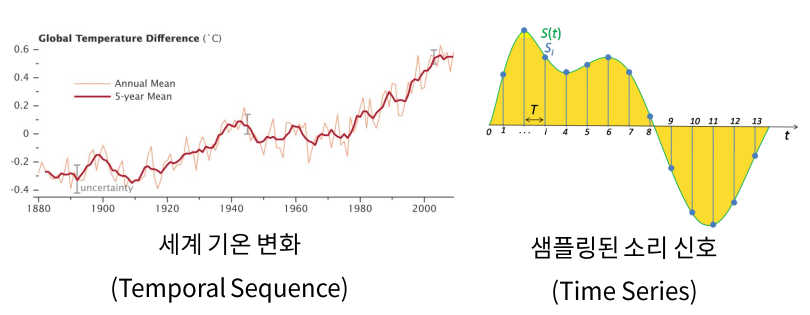

##  <span style='background-color:#fff5b1'>RNN을 이용한 Sequence data  처리 예

### <span style='background-color:#fff5b1'>Sequence-to-vector (many to one)

- Sequence Data(순서가 있는 데이터)가 입력으로 들어가 Vector(하나)가 출력된다.

- 예: 주가예측 : 4일간의 주가가 들어가면 그 다음날 주가가 나온다.
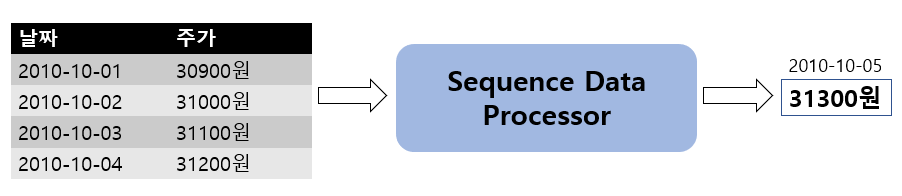
- Input: 4일간 주가
- Output: 5일째 주가

 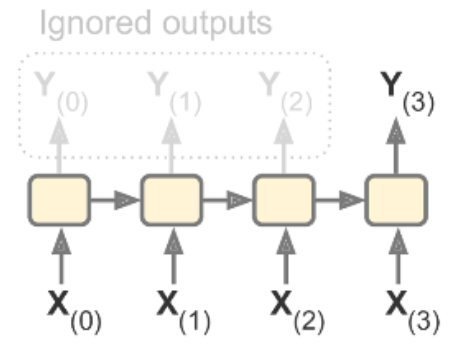

### <span style='background-color:#fff5b1'> sequence-to-sequence(many to many)
- Sequnece data가 입력으로 들어가 Sequence Data가 출력된다.
- 예: Machine translation (번역)
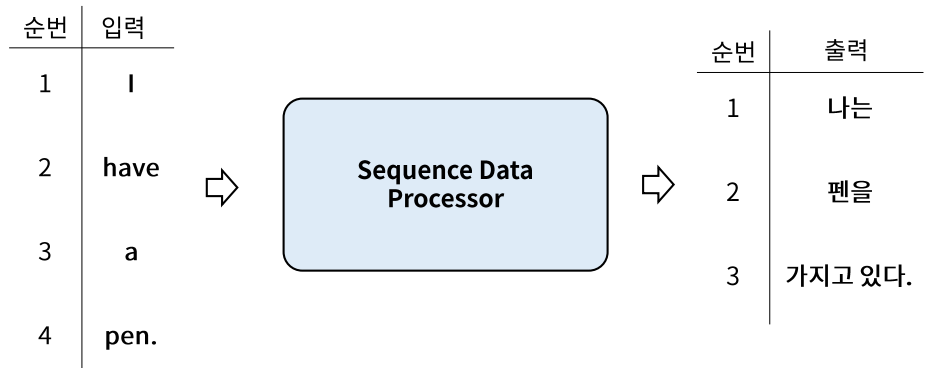    

- Input: 영어 문장 전체를 단어 단위로 순차적 입력
- Output: 번역된 한글 문장을 단어 단위로 순차적 출력
    

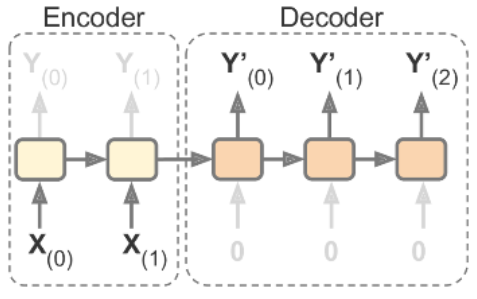

### <span style='background-color:#fff5b1'> Vector-to-sequence (one to many)
- 하나의 데이터가 입력으로 들어가 Sequence Data가 출력된다.
- 예: Image captioning (이미지를 설명하는 문장을 만드는 것)
    - 이미지가 입력되면 이미지에 대한 설명이 문장(들)으로 출력된다.
    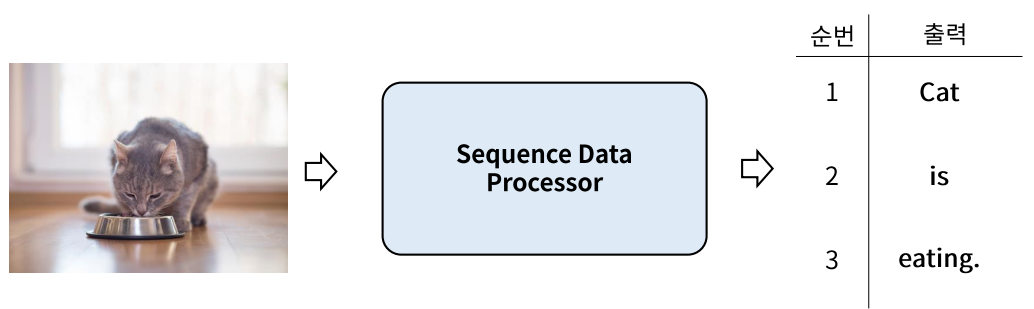

    - Input: 이미지
    - Output: 이미지에 대한 설명을 단어 단위로 순차적으로 출력 
    

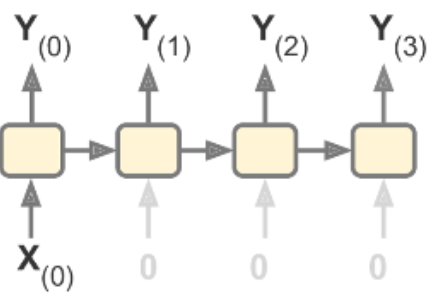

# RNN (Recurrent Neural Networks)

## <span style='background-color:#fff5b1'>Memory System (기억시스템)

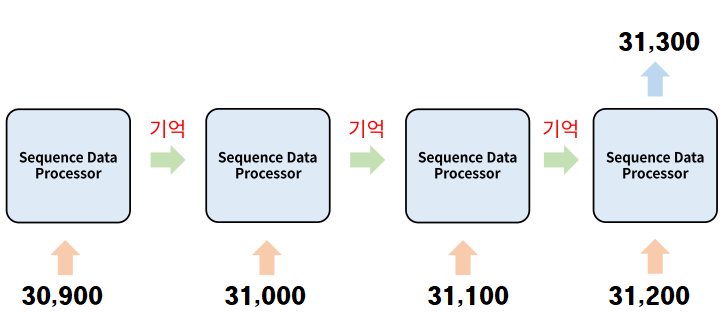

- 4일간의 주가 변화로 5일째 주가를 예측하려면 입력받은 4일간의 주가를 순서를 기억하고 있어야 한다.
- Fully Connected Layer나 Convolution Layer의 출력은 이전 Data에 대한 출력에 영향을 받지 않는다.

## <span style='background-color:#fff5b1'>Simple RNN
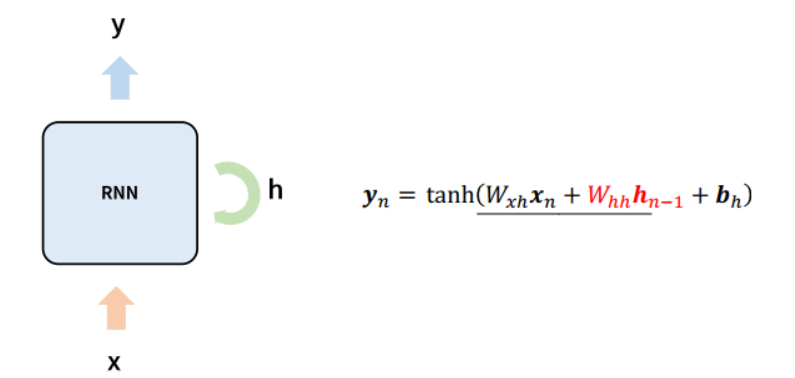

- Recurrent Layer의 unit(layer)은 Dense layer unit 구조에 순환(반복)의 개념이 들어간 것으로 이해할 수 있다.
- 각 입력 데이터는 순서대로 들어오며 Node/Unit은 <span style='background-color:#fff5b1'>**입력데이터($x_n$)와 이전 입력에 까지의 처리결과($h_{n-1}$)**</span> 를 같이 입력받는다.
- 입력 데이터에 weight를 가중합한 값과 이전입력에대한 출력 값에 weight를 가중한 값을 더해 activation을 통과한 값이 출력값이 된다. 그리고 이 값을 다음 Sequence 데이터 처리에 전달한다.

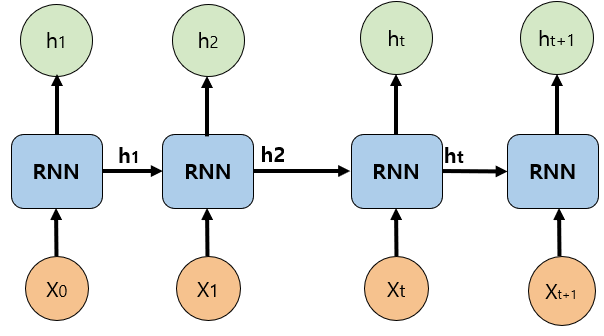

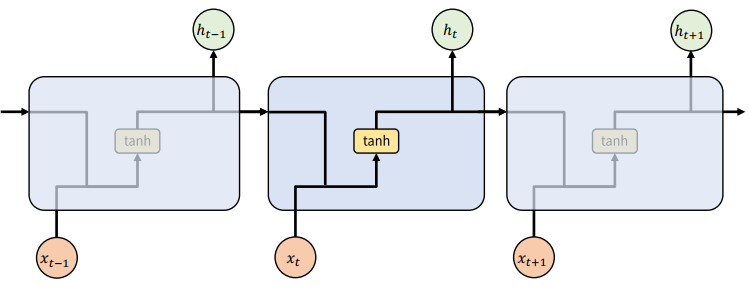

$$h_t = tanh(W_{xh} \cdot X_t + W_{hh} \cdot h_{t-1} + b_t)$$

### Simple RNN의 문제
- Sequence가 <span style='background-color:#fff5b1'>긴 경우 앞쪽의 기억이 뒤쪽에 영향을 미치지 못해 학습능력이 떨어진다.
- ReLU activation, parameter initialization의 조정 등 보다 모형의 구조적으로 해결하려는 시도 
    - <span style='background-color:#fff5b1'>**Long Short Term Memory**(LSTM; Hochreiter & Schmidhuber, 1997)
    - <span style='background-color:#fff5b1'>**Gated Recurrent Unit**(GRU; Kyunghyun Cho et al., 2014) 

## <span style='background-color:#fff5b1'>LSTM</span> (Long Short Term Memory)
- Simple RNN을 개선한 변형 알고리즘
    - 바로 전 time step의 처리리결과와 전체 time step의 처리결과를 같이 받는다.
- 오래 기억할 것은 유지하고 잊어버릴 것은 빨리 잊어버리자

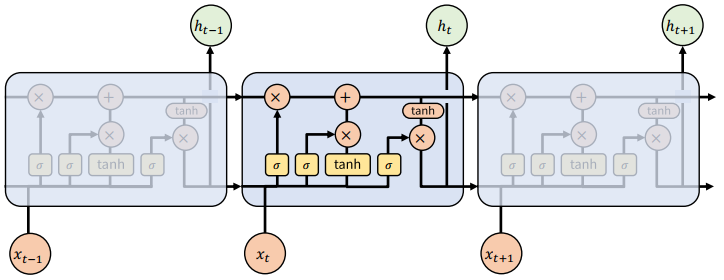

### LSTM 이전 기억

- <span style='background-color:#fff5b1'>**Cell State**
    - Long term memory 로 전체 step에 대한 누적 기억값(처리결과)
- <span style='background-color:#fff5b1'>**Hidden State**
    - Short term memory 로 이전 sequence 에 대한 기억값(처리결과)

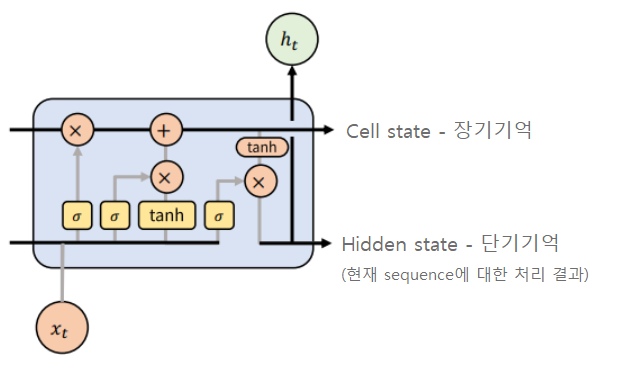

### <span style='background-color:#fff5b1'>LSTM의 구조
- <span style='background-color:#fff5b1'>**Forget gate**
    - 입력된 cell state에서 얼마나 잊어 버릴지를 처리.
    - cell state를 현재 입력기준으로 **줄인다**.(중요도에 따라)
- <span style='background-color:#fff5b1'>**Input gate**
    - 현재 sequence의 입력데이터를 cell state에 더한다.
    - cell state에 현재 입력을 **추가**
- <span style='background-color:#fff5b1'>**Output gate**
    - 현재 sequnce의 입력데이터를 처리해서 output으로 출력(hidden state)
    - 현재 입력에 대한 **처리와 출력**.

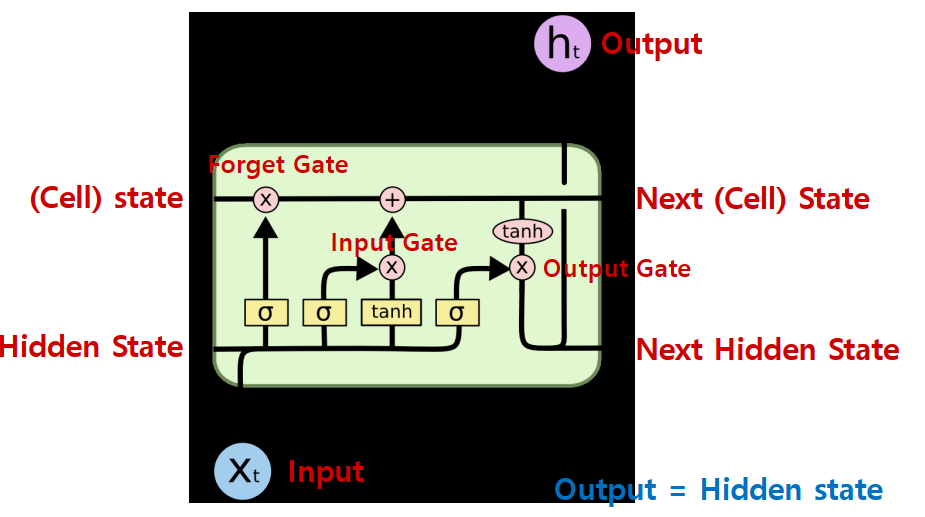

### <span style='background-color:#fff5b1'>Forget gate
- 현재 Sequence의 입력값을 기준으로 Cell state의 값에서 **얼마나 잊을지** 결정

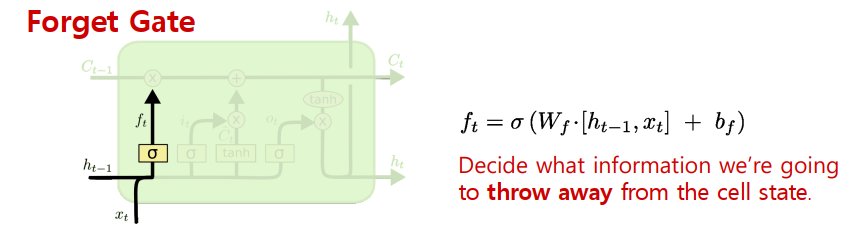

### <span style='background-color:#fff5b1'>Input gate
- 현재 Sequence의 입력값을 Cell state에 추가
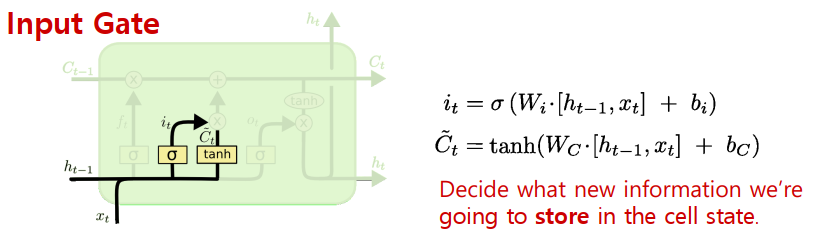

### <span style='background-color:#fff5b1'>Cell State 업데이트
- **Forget gate에서** 현재 sequence의 데이터가 추론에 얼마나 중요한지 만큼 이전 step까지의 cell state값을 줄인다. 그리고 **input gate에서** 현재 sequence의 값을 cell state에 추가한다.
    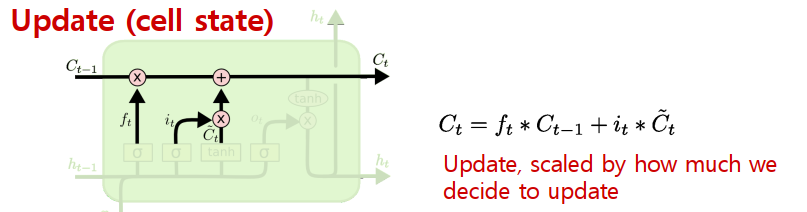

### <span style='background-color:#fff5b1'>Output gate
- LSTM에서 output gate의 처리결과는 hidden state로 다음 sequence 처리 step으로 전달된다.
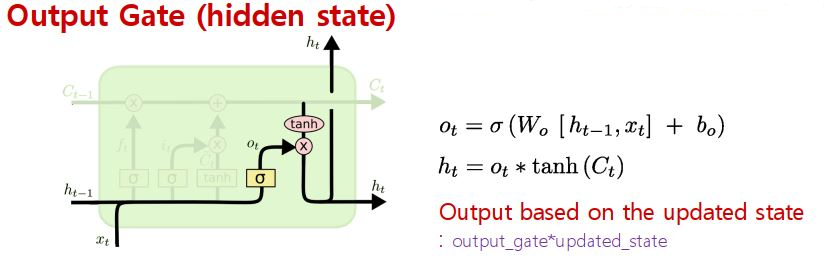